# Tugas 2

- Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    - 1.Menggunakan data spam.csv
    - 2.Fitur CountVectorizer dengan mengaktifkan stop_words
    - 3.Evaluasi hasilnya

- Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    - 1. Menggunakan data spam.csv
    - 2. Fitur TF-IDF dengan mengaktifkan stop_words
    - 3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
    - 4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

## Import Libraries

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Load dan Eksplorasi Data

In [59]:
# Load data
df = pd.read_csv('spam.csv', encoding='latin-1')

# Menggunakan kolom pertama dan kedua (v1 dan v2)
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Menampilkan informasi data
print("Shape data:", df.shape)
print("\nDistribusi label:")
print(df['label'].value_counts())
print("\nSample data:")
df.head()

Shape data: (5572, 2)

Distribusi label:
label
ham     4825
spam     747
Name: count, dtype: int64

Sample data:


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Persiapan Data

In [60]:
# Split data menjadi fitur (X) dan target (y)
X = df['message']
y = df['label']

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

Jumlah data training: 4457
Jumlah data testing: 1115


---
# Model 1: Multinomial Naive Bayes dengan CountVectorizer

## 1. Feature Extraction menggunakan CountVectorizer dengan stop_words

In [61]:
# Inisialisasi CountVectorizer dengan stop_words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit dan transform data training
X_train_count = count_vectorizer.fit_transform(X_train)

# Transform data testing
X_test_count = count_vectorizer.transform(X_test)

print(f"Shape data training setelah CountVectorizer: {X_train_count.shape}")
print(f"Shape data testing setelah CountVectorizer: {X_test_count.shape}")
print(f"Jumlah fitur (vocabulary): {len(count_vectorizer.vocabulary_)}")

Shape data training setelah CountVectorizer: (4457, 7472)
Shape data testing setelah CountVectorizer: (1115, 7472)
Jumlah fitur (vocabulary): 7472


## 2. Training Model Multinomial Naive Bayes (CountVectorizer)

In [62]:
# Inisialisasi dan training model
mnb_count = MultinomialNB()
mnb_count.fit(X_train_count, y_train)

# Prediksi
y_pred_count = mnb_count.predict(X_test_count)

## 3. Evaluasi Model (CountVectorizer)

In [63]:
# Hitung akurasi
accuracy_count = accuracy_score(y_test, y_pred_count)

print("="*60)
print("EVALUASI MODEL: CountVectorizer + Multinomial Naive Bayes")
print("="*60)
print(f"\nAkurasi: {accuracy_count:.4f} ({accuracy_count*100:.2f}%)")
print("\n" + "="*60)
print("Classification Report:")
print("="*60)
print(classification_report(y_test, y_pred_count))

# Confusion Matrix
print("="*60)
print("Confusion Matrix:")
print("="*60)
cm_count = confusion_matrix(y_test, y_pred_count)
print(cm_count)

EVALUASI MODEL: CountVectorizer + Multinomial Naive Bayes

Akurasi: 0.9839 (98.39%)

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
[[959   6]
 [ 12 138]]


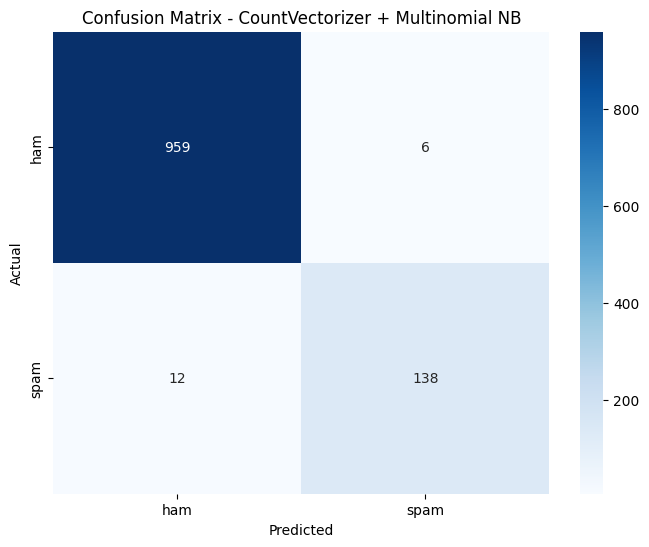

In [64]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_count, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['ham', 'spam'], 
            yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix - CountVectorizer + Multinomial NB')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

---
# Model 2: Multinomial Naive Bayes dengan TF-IDF

## 1. Feature Extraction menggunakan TF-IDF dengan stop_words

In [65]:
# Inisialisasi TfidfVectorizer dengan stop_words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit dan transform data training
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform data testing
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"Shape data training setelah TF-IDF: {X_train_tfidf.shape}")
print(f"Shape data testing setelah TF-IDF: {X_test_tfidf.shape}")
print(f"Jumlah fitur (vocabulary): {len(tfidf_vectorizer.vocabulary_)}")

Shape data training setelah TF-IDF: (4457, 7472)
Shape data testing setelah TF-IDF: (1115, 7472)
Jumlah fitur (vocabulary): 7472


## 2. Training Model Multinomial Naive Bayes (TF-IDF)

In [66]:
# Inisialisasi dan training model
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train_tfidf, y_train)

# Prediksi
y_pred_tfidf = mnb_tfidf.predict(X_test_tfidf)

## 3. Evaluasi Model (TF-IDF)

In [67]:
# Hitung akurasi
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

print("="*60)
print("EVALUASI MODEL: TF-IDF + Multinomial Naive Bayes")
print("="*60)
print(f"\nAkurasi: {accuracy_tfidf:.4f} ({accuracy_tfidf*100:.2f}%)")
print("\n" + "="*60)
print("Classification Report:")
print("="*60)
print(classification_report(y_test, y_pred_tfidf))

# Confusion Matrix
print("="*60)
print("Confusion Matrix:")
print("="*60)
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
print(cm_tfidf)

EVALUASI MODEL: TF-IDF + Multinomial Naive Bayes

Akurasi: 0.9668 (96.68%)

Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Confusion Matrix:
[[965   0]
 [ 37 113]]


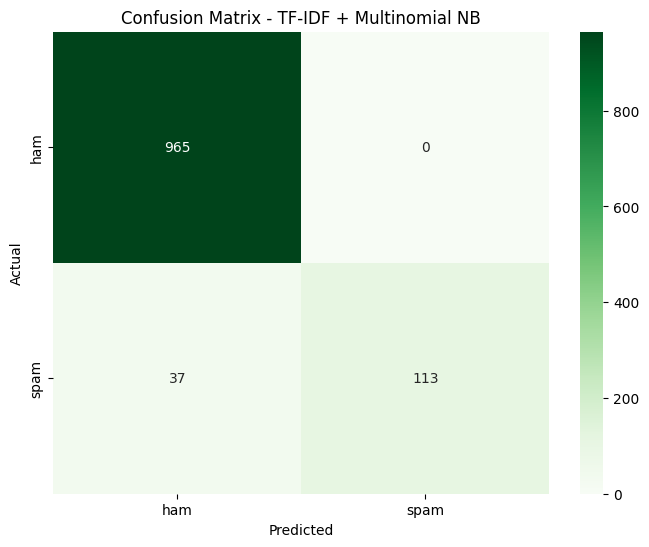

In [68]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['ham', 'spam'], 
            yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix - TF-IDF + Multinomial NB')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

---
# Perbandingan dan Kesimpulan

## Perbandingan Hasil

In [69]:
# Membuat dataframe untuk perbandingan
comparison = pd.DataFrame({
    'Model': ['CountVectorizer + MNB', 'TF-IDF + MNB'],
    'Accuracy': [accuracy_count, accuracy_tfidf]
})

# Menambahkan metrik lainnya dari classification report
from sklearn.metrics import precision_score, recall_score, f1_score

comparison['Precision'] = [
    precision_score(y_test, y_pred_count, pos_label='spam'),
    precision_score(y_test, y_pred_tfidf, pos_label='spam')
]

comparison['Recall'] = [
    recall_score(y_test, y_pred_count, pos_label='spam'),
    recall_score(y_test, y_pred_tfidf, pos_label='spam')
]

comparison['F1-Score'] = [
    f1_score(y_test, y_pred_count, pos_label='spam'),
    f1_score(y_test, y_pred_tfidf, pos_label='spam')
]

print("="*80)
print("PERBANDINGAN HASIL MODEL")
print("="*80)
print(comparison.to_string(index=False))
print("="*80)

PERBANDINGAN HASIL MODEL
                Model  Accuracy  Precision   Recall  F1-Score
CountVectorizer + MNB  0.983857   0.958333 0.920000  0.938776
         TF-IDF + MNB  0.966816   1.000000 0.753333  0.859316

PERBANDINGAN HASIL MODEL
                Model  Accuracy  Precision   Recall  F1-Score
CountVectorizer + MNB  0.983857   0.958333 0.920000  0.938776
         TF-IDF + MNB  0.966816   1.000000 0.753333  0.859316


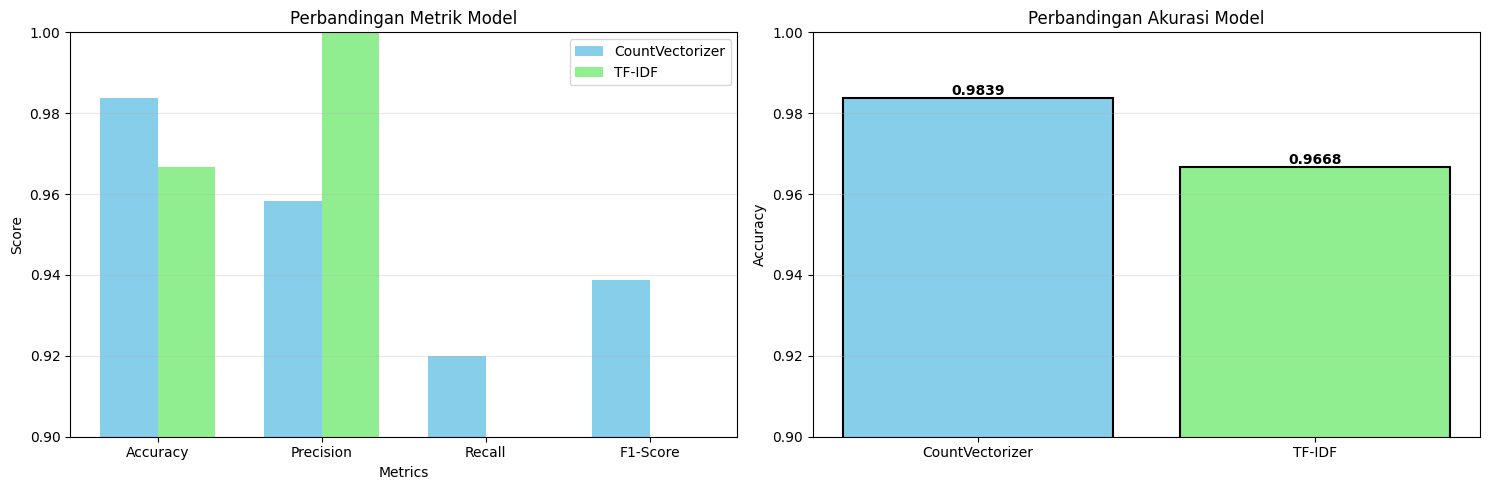

In [70]:
# Visualisasi perbandingan
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart untuk semua metrik
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.35

values_count = [comparison.iloc[0][metric] for metric in metrics]
values_tfidf = [comparison.iloc[1][metric] for metric in metrics]

axes[0].bar(x - width/2, values_count, width, label='CountVectorizer', color='skyblue')
axes[0].bar(x + width/2, values_tfidf, width, label='TF-IDF', color='lightgreen')
axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Score')
axes[0].set_title('Perbandingan Metrik Model')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].set_ylim([0.9, 1.0])
axes[0].grid(axis='y', alpha=0.3)

# Bar chart hanya untuk accuracy
models = ['CountVectorizer', 'TF-IDF']
accuracies = [accuracy_count, accuracy_tfidf]
colors = ['skyblue', 'lightgreen']

bars = axes[1].bar(models, accuracies, color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Perbandingan Akurasi Model')
axes[1].set_ylim([0.9, 1.0])
axes[1].grid(axis='y', alpha=0.3)

# Menambahkan nilai di atas bar
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{acc:.4f}',
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Kesimpulan

In [71]:
# Menentukan model terbaik
if accuracy_tfidf > accuracy_count:
    best_model = "TF-IDF"
    difference = accuracy_tfidf - accuracy_count
elif accuracy_count > accuracy_tfidf:
    best_model = "CountVectorizer"
    difference = accuracy_count - accuracy_tfidf
else:
    best_model = "Keduanya sama"
    difference = 0

print(f"1. Model dengan CountVectorizer:")
print(f"   - Akurasi: {accuracy_count:.4f} ({accuracy_count*100:.2f}%)")
print()
print(f"2. Model dengan TF-IDF:")
print(f"   - Akurasi: {accuracy_tfidf:.4f} ({accuracy_tfidf*100:.2f}%)")
print()
if difference > 0:
    print(f"3. Model Terbaik: {best_model}")
    print(f"   - Selisih akurasi: {difference:.4f} ({difference*100:.2f}%)")

1. Model dengan CountVectorizer:
   - Akurasi: 0.9839 (98.39%)

2. Model dengan TF-IDF:
   - Akurasi: 0.9668 (96.68%)

3. Model Terbaik: CountVectorizer
   - Selisih akurasi: 0.0170 (1.70%)




Berdasarkan hasil evaluasi kedua model klasifikasi spam:

1. Model dengan CountVectorizer:
   - Akurasi: 0.9839 (98.39%)
   - CountVectorizer menghitung frekuensi kemunculan kata dalam dokumen

2. Model dengan TF-IDF:
   - Akurasi: 0.9668 (96.68%)
   - TF-IDF memberikan bobot berdasarkan kepentingan kata dalam dokumen

3. Model Terbaik: CountVectorizer
   - Selisih akurasi: 0.0170 (1.70%)

4. Alasan CountVectorizer lebih baik:
   - Lebih sederhana dan mudah diinterpretasi
   - Frekuensi kata murni sudah cukup untuk membedakan spam dan ham
   - Lebih cepat dalam proses training dan prediksi

5. Kedua model menunjukkan performa yang sangat baik dengan akurasi di atas 95%
   pada dataset spam.csv